## 1.0 Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import init_simple_mdp as imdp
import init_load_board as ib
import seaborn as sns
from matplotlib import cm, colors

In [2]:
df = pd.read_csv('player10_results.csv')
df = df[['epsilon','tokens','score','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

In [3]:
epsilon_list = list(df.epsilon.unique())
epsilon_list = list(range(1,11))

df0 = df.loc[df.tokens==0].copy()
df0['ppd'] = df0.score / df0.optimal_value

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for epsilon in range(1,11):
    
    temp = df0.loc[df0.epsilon==epsilon].set_index('score')['optimal_policy_name'].copy()
    epsilon_dfs.append(temp)

In [4]:
epsilon_dfs_expanded = []

for epsilon in range(10):

    temp_list = []
    for action in epsilon_dfs[epsilon]: 
        try: 
            temp_list.append([action,imdp.actions[action]['coords'][0],imdp.actions[action]['coords'][1]])
        except: 
            continue

    temp = pd.DataFrame(temp_list, columns = ['a','x','y'])
    
    epsilon_dfs_expanded.append(temp)

## 2.0 Policy Heatmaps for Different Epsilon

In [12]:
def createKde(data, x, y, title="", ax=None, cmap='Blues', levels=10, alpha=1):
    if ax == None:
        ax = plt.gca()
    sns.kdeplot(data=data, x=x, y=y, cmap=cmap, fill=True, levels=levels, ax=ax, alpha=alpha)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ib.plot_basic_board(axes=ax)
    ax.title.set_text(title)

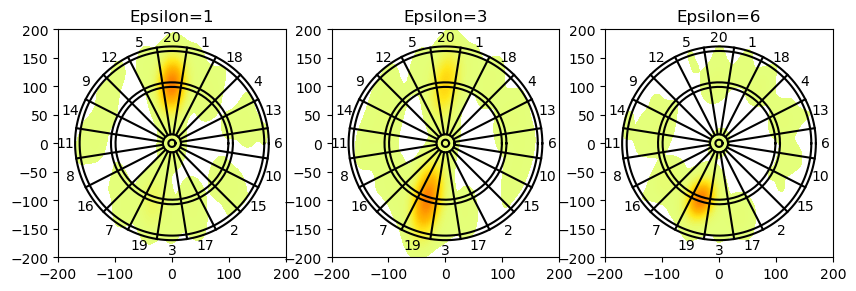

In [14]:
cmap = 'Wistia'
alpha = 1
levels = 50

fig, ax = plt.subplots(1, 3,figsize=(10,10))
createKde(data=epsilon_dfs_expanded[0], x='x', y='y', title="Epsilon=1", ax=ax[0], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[2], x='x', y='y', title="Epsilon=3", ax=ax[1], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[5], x='x', y='y', title="Epsilon=6", ax=ax[2], cmap=cmap, levels=levels, alpha=alpha)



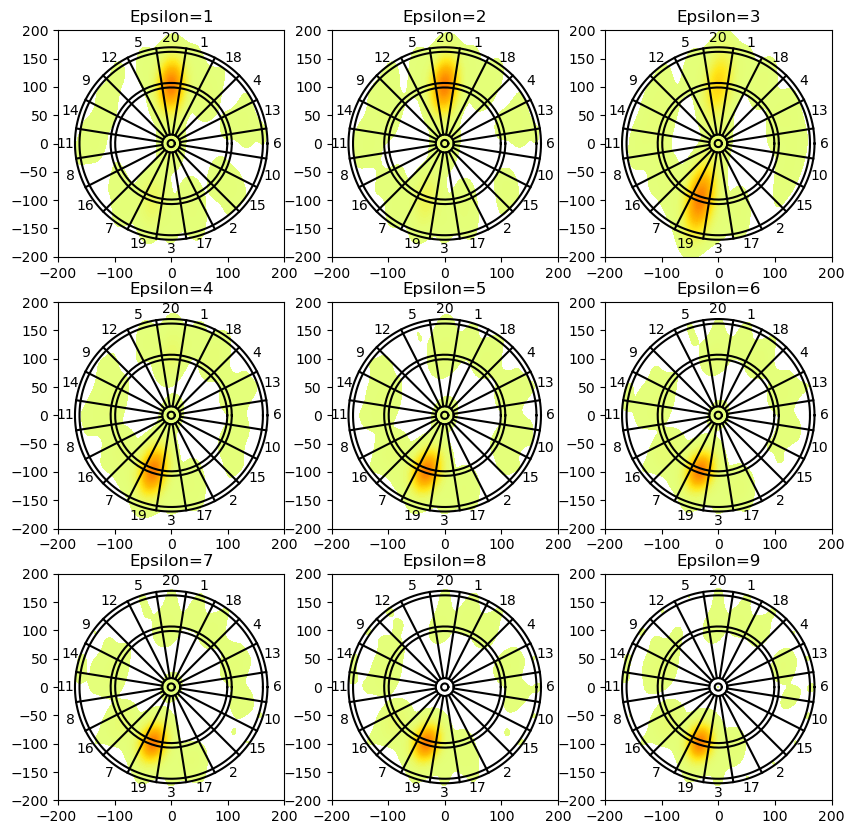

In [16]:

cmap = 'Wistia'
alpha = 1
levels = 50

fig, ax = plt.subplots(3, 3,figsize=(10,10))
createKde(data=epsilon_dfs_expanded[0], x='x', y='y', title="Epsilon=1", ax=ax[0,0], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[1], x='x', y='y', title="Epsilon=2", ax=ax[0,1], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[2], x='x', y='y', title="Epsilon=3", ax=ax[0,2], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[3], x='x', y='y', title="Epsilon=4", ax=ax[1,0], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[4], x='x', y='y', title="Epsilon=5", ax=ax[1,1], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[5], x='x', y='y', title="Epsilon=6", ax=ax[1,2], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[6], x='x', y='y', title="Epsilon=7", ax=ax[2,0], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[7], x='x', y='y', title="Epsilon=8", ax=ax[2,1], cmap=cmap, levels=levels, alpha=alpha)
createKde(data=epsilon_dfs_expanded[9], x='x', y='y', title="Epsilon=9", ax=ax[2,2], cmap=cmap, levels=levels, alpha=alpha)



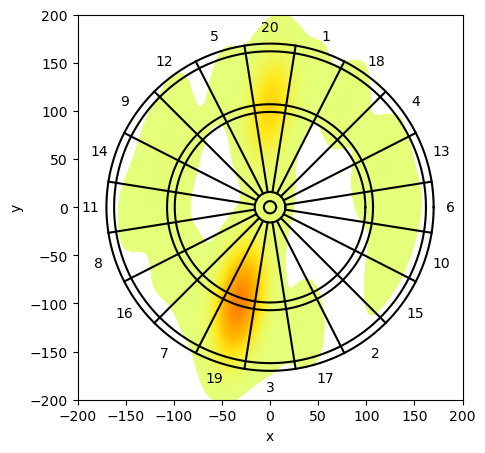

In [13]:
#fig = sns.set(rc={'figure.figsize':(5,5)})
ax = ib.plot_basic_board(figsize=(5,5))
cmap = 'Wistia'
alpha = 1
levels = 50
#thresh=0.02,

fig = sns.kdeplot(data=epsilon_dfs_expanded[2], x='x', y='y',  cmap=cmap, fill=True, levels=levels, ax=ax, alpha=alpha,warn_singular=False)
#fig = 

## 3. Policy Token Usage

In [20]:
# Add boolean column to indicate whether the policy uses tokens or not 
df['policy_is_token'] = df['optimal_policy'] >= imdp.throw_num

epsilon_dfs = []

for epsilon in range(7):
    
    temp = df.loc[df.epsilon==epsilon].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)


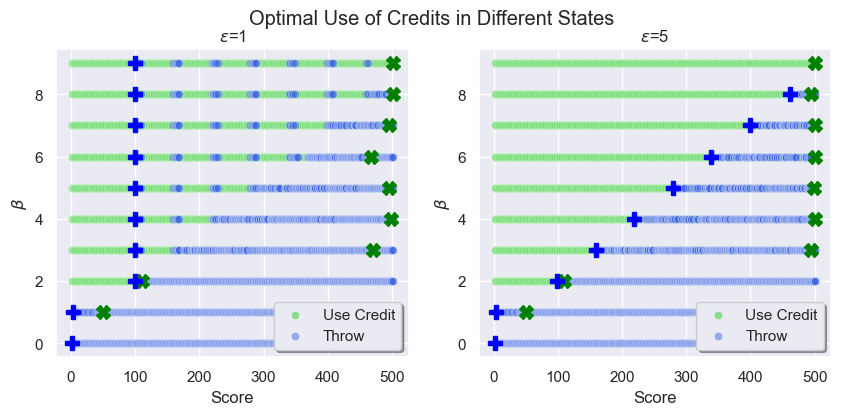

In [117]:
figure, ax = plt.subplots(1, 2,figsize=(10,4))

epsilon = 1
df_temp = df[df.optimal_policy != -1]
df_actions = df_temp[df_temp.epsilon == epsilon]

#sns.set(rc={'figure.figsize':(6,4)})
fig = sns.scatterplot(data=df_actions.loc[df_actions.policy_is_token==True], x="score",y="tokens",alpha=0.5,label='Use Credit',color='limegreen',ax=ax[0])
fig = sns.scatterplot(data=df_actions.loc[df_actions.policy_is_token==False], x="score",y="tokens",alpha=0.5,label='Throw',color='royalblue',ax=ax[0])

fig = ax[0].set_ylabel(r'$\beta$')
fig = ax[0].set_xlabel(r'Score')
fig = ax[0].set_title(rf'$\epsilon$={epsilon}')
fig = ax[0].legend(loc='lower right', fancybox=True, shadow=True)

max_token_list = []
min_throw_list = []
for t in range(10):
    max_token = df_actions.loc[(df_actions.tokens==t) & (df_actions.policy_is_token==True)].score.max()
    min_throw = df_actions.loc[(df_actions.tokens==t) & (df_actions.policy_is_token==False)].score.min()
    ax[0].plot(max_token,t,marker='X',markersize=10,color='green')
    ax[0].plot(min_throw,t,marker='P',markersize=10,color='blue')

epsilon = 5
df_temp = df[df.optimal_policy != -1]
df_actions = df_temp[df_temp.epsilon == epsilon]

#sns.set(rc={'figure.figsize':(6,4)})
fig = sns.scatterplot(data=df_actions.loc[df_actions.policy_is_token==True], x="score",y="tokens",alpha=0.5,label='Use Credit',color='limegreen',ax=ax[1])
fig = sns.scatterplot(data=df_actions.loc[df_actions.policy_is_token==False], x="score",y="tokens",alpha=0.5,label='Throw',color='royalblue',ax=ax[1])

fig = ax[1].set_ylabel(r'$\beta$')
fig = ax[1].set_xlabel(r'Score')
fig = ax[1].set_title(rf'$\epsilon$={epsilon}')
fig = ax[1].legend(loc='lower right', fancybox=True, shadow=True)

max_token_list = []
min_throw_list = []
for t in range(10):
    max_token = df_actions.loc[(df_actions.tokens==t) & (df_actions.policy_is_token==True)].score.max()
    min_throw = df_actions.loc[(df_actions.tokens==t) & (df_actions.policy_is_token==False)].score.min()
    ax[1].plot(max_token,t,marker='X',markersize=10,color='green')
    ax[1].plot(min_throw,t,marker='P',markersize=10,color='blue')


fig = figure.suptitle(r'Optimal Use of Credits in Different States')

